**FUNCTIONS**

In [ ]:
import random,copy,math
#___________________________________________
class individual:
  def __init__(self):
    self.gene = [0]*N
    self.fitness = 0
  #________________________
  def work3_basicequation(self):
    equ = 0
    for i in range(1,len(self.gene)):
      equ += self.gene[i]
    self.fitness = equ
  #________________________
  def work3_minimisationtest(self):
    equ = 0
    n = 10
    for i in range(1,len(self.gene)):
      equ += self.gene[i]*self.gene[i] - 10 * math.cos(2*math.pi*self.gene[i])
    self.fitness = 10* n + equ
  #________________________
  def getFitness(self):
    return self.fitness
#___________________________________________
def initialize_population():
  global population,offspring
  for x in range (0, P):
    tempgene=[]
    for x in range (0, N):
      tempgene.append(random.uniform(RANGE_MIN,RANGE_MAX ))
    newind = individual()
    newind.gene = tempgene.copy()
    population.append(newind)
  for i in population:
    i.work3_basicequation()
  offspring = copy.deepcopy(population)
#___________________________________________
def tournamentSelection():
  global offspring,population
  for i in range (0, P):
    parent1 = random.randint( 0, P-1 )
    off1 = population[parent1]
    parent2 = random.randint( 0, P-1 )
    off2 = population[parent2]
    if off1.fitness < off2.fitness:
      offspring.append( off1 )
    else:
      offspring.append( off2 )
#___________________________________________
def roulette_wheel():
  global offspring,population
  population_fitness = 0
  for individual in population:
    if individual.fitness != 0:
      population_fitness += (1/individual.fitness)
  for i in range(P):
    selection_point = random.uniform(0,population_fitness)
    running_total = 0
    j=0
    while running_total <= selection_point and j < len(population):
      if population[j].fitness !=0:
        running_total += (1/(population[j].fitness))
      j+=1
    offspring.append(population[j-1])
#___________________________________________
def recombine():
  temp = individual()
  for i in range(0,P,2):
    for j in range(0,N):
      temp.gene[j] = offspring[i].gene[j]
      crosspoint = random.randint( 0, N-1)
    for j in range(crosspoint,N):
      offspring[i].gene[j] = offspring[i+1].gene[j]
      offspring[i+1].gene[j] = temp.gene[j]
#___________________________________________
def mutate():
  for i in range(0,P):
    for j in range(0,N):
      if random.random() < Mu_Rate :
        alter = random.uniform(0,MUT_Step)
        if random.random()%2:
          offspring[i].gene[j] = offspring[i].gene[j]+alter;
          if offspring[i].gene[j] > 1.0:
            offspring[i].gene[j] = 1.0
        else:
          offspring[i].gene[j] = offspring[i].gene[j]-alter 
          if offspring[i].gene[j] < 0.0:
            offspring[i].gene[j] = 0.0
  for i in offspring:
    i.work3_basicequation()
#___________________________________________
def listOfFitness(offspring):
  Fitness= []
  offspring_fitness = 0
  for i in offspring:
    offspring_fitness +=i.getFitness()
  return offspring_fitness
#___________________________________________
def best_offspring_low(offspring):
  global best_offspring
  best_offspring = offspring[0]
  best_Fitness =  offspring[0].fitness
  for i in offspring:
    if i.fitness < best_offspring.fitness:
      best_offspring = i
      best_Fitness = i.fitness
  return best_offspring
#___________________________________________


**ALTERING VARIABLES**

In [ ]:
population,offspring,meanFitness,Best_fitness,offspring = [],[],[],[],[]
P,N,Generations = 50,50,50
Mu_Rate = 0.1
MUT_Step = 0.01
RANGE_MIN = -10
RANGE_MAX = 10
X = 0
best_Fitness,worst_offspring = 0,0
population2  = []

**WORKSHEET 3 BASIC EQUATION**

In [ ]:
initialize_population()
best_offspring_low(population)
population2 = population
for i in range(0,Generations):
  tournamentSelection()
  recombine()
  mutate()
  
  for j in range(1,len(offspring)):
    if offspring[j].fitness > offspring[worst_offspring].fitness:
      worst_offspring = j
  offspring[worst_offspring] = best_offspring
  
  bestOffspring = best_offspring_low(offspring)
  Best_fitness.append(bestOffspring.fitness)
  population = copy.deepcopy(offspring)
  meanFitness.append(listOfFitness(offspring)/P)
  offspring = []

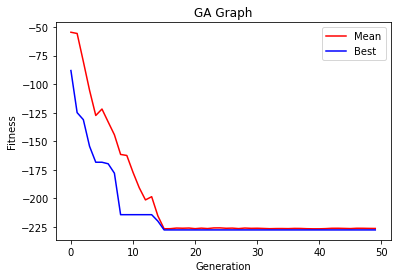

In [ ]:
from matplotlib import pyplot as plt
mean, = plt.plot(meanFitness,'r')
mean.set_label("Mean")
best, = plt.plot(Best_fitness,'b')
best.set_label("Best")
plt.title('GA Graph')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()

plt.show()

**WORKSHEET 3 MINISATION EQUATION** - CHANGED EQUATION AND VARIABLES

In [ ]:
#___________________________________________
def initialize_population():
  global population,offspring
  for x in range (0, P):
    tempgene=[]
    for x in range (0, N):
      tempgene.append(random.uniform(RANGE_MIN,RANGE_MAX ))
    newind = individual()
    newind.gene = tempgene.copy()
    population.append(newind)
  for i in population:
    i.work3_basicequation()
  offspring = copy.deepcopy(population)
#___________________________________________
def mutate():
  for i in range(0,P):
    for j in range(0,N):
      if random.random() < Mu_Rate :
        alter = random.uniform(0,MUT_Step)
        if random.random()%2:
          offspring[i].gene[j] = offspring[i].gene[j]+alter;
          if offspring[i].gene[j] > 1.0:
            offspring[i].gene[j] = 1.0
        else:
          offspring[i].gene[j] = offspring[i].gene[j]-alter 
          if offspring[i].gene[j] < 0.0:
            offspring[i].gene[j] = 0.0
  for i in offspring:
    i.work3_basicequation()
#___________________________________________

**VARIABLES**

In [ ]:
population,offspring,meanFitness,Best_fitness,offspring = [],[],[],[],[]
P,N,Generations = 50,50,50
Mu_Rate = 0.1
MUT_Step = 0.01
RANGE_MIN = -5.12
RANGE_MAX = 5.12
X = 0
best_Fitness,worst_offspring = 0,0
population2  = []

In [ ]:
initialize_population()
best_offspring_low(population)
population2 = population
for i in range(0,Generations):
  tournamentSelection()
  recombine()
  mutate()
  
  for j in range(1,len(offspring)):
    if offspring[j].fitness > offspring[worst_offspring].fitness:
      worst_offspring = j
  offspring[worst_offspring] = best_offspring
  
  bestOffspring = best_offspring_low(offspring)
  Best_fitness.append(bestOffspring.fitness)
  population = copy.deepcopy(offspring)
  meanFitness.append(listOfFitness(offspring)/P)
  offspring = []

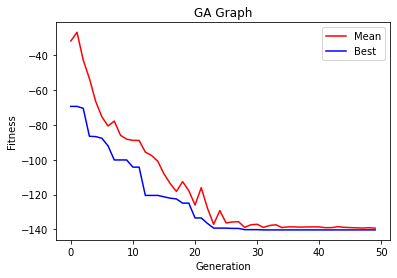

In [ ]:
from matplotlib import pyplot as plt
mean, = plt.plot(meanFitness,'r')
mean.set_label("Mean")
best, = plt.plot(Best_fitness,'b')
best.set_label("Best")
plt.title('GA Graph')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.legend()

plt.show()